#### Import package

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

import warnings
warnings.filterwarnings("ignore")

In [2]:
drive.mount("/content/drive", force_remount=True);

Mounted at /content/drive


#### Load Data

In [3]:
Columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
Encoding = 'ISO-8859-1'

df = pd.read_csv('drive/MyDrive/Data/training.1600000.processed.noemoticon.csv', encoding=Encoding, names=Columns)
# df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=Encoding, names=Columns)

df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
print(len(df))

1600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

#### Data Preprocessing

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = df[['target', 'text']]
data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
pd.options.mode.chained_assignment = None
data['target'] = data['target'].replace(4, 1)
data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [10]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

dataset = pd.concat([data_pos, data_neg])
print(dataset.shape)

(1600000, 2)


In [11]:
dataset.head()

,target,text
800000,1,I LOVE @Health4UandPets u guys r the best!!
800001,1,im meeting up with one of my besties tonight! ...
800002,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,Being sick can be really cheap when it hurts t...
800004,1,@LovesBrooklyn2 he has that effect on everyone


In [12]:
dataset['text'] = dataset['text'].str.lower()
dataset.head()

,target,text
800000,1,i love @health4uandpets u guys r the best!!
800001,1,im meeting up with one of my besties tonight! ...
800002,1,"@darealsunisakim thanks for the twitter add, s..."
800003,1,being sick can be really cheap when it hurts t...
800004,1,@lovesbrooklyn2 he has that effect on everyone


In [13]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [14]:
STOPWORDS = set(stopwordlist)

def cleaning (text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

dataset['text'] = dataset['text'].apply(cleaning)
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [15]:
import string

english_punctuations = string.punctuation # 按照標點符號分割句子
punctuations_list = english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

dataset['text'] = dataset['text'].apply(remove_punctuations)
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

In [16]:
import re

def remove_repeat(text): # 縮減重複字元
    return re.sub(r'(.)\1+', r'\1\1', text)

dataset['text'] = dataset['text'].apply(remove_repeat)
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

In [17]:
def remove_URLs (data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', data)

dataset['text'] = dataset['text'].apply(remove_URLs)
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

In [18]:
def remove_numbers (data):
    return re.sub('[0-9]+', ' ', data)

dataset['text'] = dataset['text'].apply(remove_numbers)
dataset['text'].tail()

799995    sick spending day laying bed listening taylors...
799996                                           gmail down
799997                                rest peace farrah sad
799998    ericurbane sounds like rival flagging ads not ...
799999    resit exams over summer wishes worked harder f...
Name: text, dtype: object

#### Preprocessing - 2

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\s+', gaps=True)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)

dataset['text'].tail()

799995    [sick, spending, day, laying, bed, listening, ...
799996                                        [gmail, down]
799997                           [rest, peace, farrah, sad]
799998    [ericurbane, sounds, like, rival, flagging, ad...
799999    [resit, exams, over, summer, wishes, worked, h...
Name: text, dtype: object

In [20]:
dataset['text'].head()

800000           [love, health, uandpets, u, guys, r, best]
800001    [im, meeting, one, besties, tonight, cant, wai...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
Name: text, dtype: object

In [21]:
import nltk
from functools import lru_cache

st = nltk.PorterStemmer()
stem = lru_cache(maxsize=50000)(st.stem) # 函數結果的緩存，最多緩存50000個結果

def stemming (data): # 對單字進行詞幹提取
    data = [stem(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(stemming)
dataset['text'].head()

800000             [love, health, uandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

In [22]:
lm = nltk.WordNetLemmatizer()
lemmatize = lru_cache(maxsize=50000)(lm.lemmatize)

nltk.download('wordnet')

def lemmatizing (data): # 對單字進行詞形還原
    data = [lemmatize(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lemmatizing)
dataset['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


800000             [love, health, uandpet, u, guy, r, best]
800001    [im, meet, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twitter, add, sunisa,...
800003    [sick, realli, cheap, hurt, much, eat, real, f...
800004                     [lovesbrooklyn, effect, everyon]
Name: text, dtype: object

In [23]:
dataset.head()

,target,text
800000,1,"[love, health, uandpet, u, guy, r, best]"
800001,1,"[im, meet, one, besti, tonight, cant, wait, gi..."
800002,1,"[darealsunisakim, thank, twitter, add, sunisa,..."
800003,1,"[sick, realli, cheap, hurt, much, eat, real, f..."
800004,1,"[lovesbrooklyn, effect, everyon]"


In [24]:
dataset[dataset['target'] == 0]["text"]

0         [switchfoot, httptwitpiccom, y, zl, aww, that,...
1         [upset, cant, updat, facebook, text, it, might...
2         [kenichan, dive, mani, time, ball, manag, save...
3                    [whole, bodi, feel, itchi, like, fire]
4         [nationwideclass, no, it, not, behav, all, im,...
                                ...                        
799995    [sick, spend, day, lay, bed, listen, taylorswift]
799996                                        [gmail, down]
799997                            [rest, peac, farrah, sad]
799998    [ericurban, sound, like, rival, flag, ad, not,...
799999    [resit, exam, over, summer, wish, work, harder...
Name: text, Length: 800000, dtype: object

In [25]:
words = set()
for data in dataset['text']:
    for word in data:
        words.add(word)

print(len(words))

691491


In [26]:
# from wordcloud import WordCloud

# data_neg = dataset[dataset['target'] == 0]['text'].apply(lambda x: ' '.join(x))

new_data = dataset
new_data['text'] = new_data['text'].apply(lambda x: ' '.join(x)) # 將list轉回成字串
new_data.head()

,target,text
800000,1,love health uandpet u guy r best
800001,1,im meet one besti tonight cant wait girl talk
800002,1,darealsunisakim thank twitter add sunisa got m...
800003,1,sick realli cheap hurt much eat real food plu ...
800004,1,lovesbrooklyn effect everyon


#### Use Word2Vec

In [ ]:
# Use Word2Vec to convert words to vectors
from gensim.models import Word2Vec

sentences = [row.split() for row in new_data['text']]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

word_vectors = model.wv
X = []

for sentence in sentences:
    vectors = []
    for word in sentence:
        vectors.append(word_vectors[word])
    X.append(vectors)

In [ ]:
print(X[0])

[array([ 0.37061006,  1.7180774 ,  1.4165466 , -1.7483013 , -0.18449938,
        0.37490526, -0.3685473 ,  2.290671  ,  0.78286403, -2.0799904 ,
        2.1327593 , -2.0366464 ,  0.23233066,  1.0115927 ,  1.1614784 ,
       -0.2772113 , -1.6379224 , -0.8755437 ,  3.5554318 , -0.17861398,
        0.3599371 , -0.24474458,  2.1635752 , -2.406898  ,  0.11437868,
        0.16651158,  1.4597486 , -1.920933  , -0.8406093 , -1.1669666 ,
        0.6092835 , -0.3716748 ,  0.32210603,  3.5693052 , -1.5367675 ,
       -0.23601936, -0.5232852 , -1.2123235 , -0.95633423, -1.713566  ,
       -1.7762394 , -0.2854368 , -1.1424745 ,  0.5042474 , -0.02511418,
       -0.81632656, -1.9830581 ,  0.12028097, -1.168119  , -1.4796041 ,
       -0.2206042 , -0.2654624 , -1.3263478 , -0.8700707 , -0.84190243,
        0.4326733 , -0.8550184 , -1.8307    , -0.93561304, -1.416928  ,
       -3.6736808 ,  1.1869637 ,  1.2249026 , -0.20356357, -1.9528887 ,
       -1.2422972 , -1.8656316 ,  1.6254709 ,  0.4900222 , -3.6

In [ ]:
X = pad_sequences(X) # 將整數序列填充到相同的長度
y = pd.get_dummies(new_data['target']).values # 將目標變量轉換為二進制矩陣

#### Origin

In [ ]:
max_features = len(words)
tokenizer_keras = Tokenizer(num_words=max_features, split=' ') # 創建標記器
tokenizer_keras.fit_on_texts(new_data['text'].values) # 基於文本數據創建標記詞庫
X = tokenizer_keras.texts_to_sequences(new_data['text'].values) # 將文本轉換為整數序列
X = pad_sequences(X) # 將整數序列填充到相同的長度
y = pd.get_dummies(new_data['target']).values # 將目標變量轉換為二進制矩陣

#### Split Data (Word2Vec)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1280000, 38, 100)
(320000, 38, 100)
(1280000, 2)
(320000, 2)


In [ ]:
# validation_size = 240000

# x_validate = x_test[-validation_size:]
# y_validate = y_test[-validation_size:]
# x_test = x_test[:-validation_size]
# y_test = y_test[:-validation_size]

In [ ]:
print(y_test[0])

[False  True]


#### Word2Vec Model & Train

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from keras.optimizers import Adam
from keras.regularizers import L2

embed_dim = 128
LSTM_out = 196

mx_features = 10000

model = Sequential()

# model.add(Embedding(mx_features, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=LSTM_out, dropout=0.2))
model.add(Dense(units=10, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax', kernel_regularizer=L2(0.01)))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spatial_dropout1d_4 (Spati  (None, 38, 100)           0         
 alDropout1D)                                                    
                                                                 
 lstm_4 (LSTM)               (None, 196)               232848    
                                                                 
 dense_8 (Dense)             (None, 10)                1970      
                                                                 
 dense_9 (Dense)             (None, 2)                 22        
                                                                 
Total params: 234840 (917.34 KB)
Trainable params: 234840 (917.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
from keras import callbacks

# 連續3次val_loss沒有改善，就停止訓練
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, mode="min", restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data = (x_test, y_test), callbacks=[early_stopping])

Epoch 1/5
10000/10000 [==============================] - 190s 19ms/step - loss: 0.5214 - accuracy: 0.7420 - val_loss: 0.4736 - val_accuracy: 0.7729
Epoch 2/5
10000/10000 [==============================] - 190s 19ms/step - loss: 0.5080 - accuracy: 0.7496 - val_loss: 0.4655 - val_accuracy: 0.7778
Epoch 3/5
10000/10000 [==============================] - 189s 19ms/step - loss: 0.5061 - accuracy: 0.7513 - val_loss: 0.5057 - val_accuracy: 0.7508
Epoch 4/5
10000/10000 [==============================] - 192s 19ms/step - loss: 0.5005 - accuracy: 0.7548 - val_loss: 0.4864 - val_accuracy: 0.7725
Epoch 5/5
10000/10000 [==============================] - 188s 19ms/step - loss: 0.4960 - accuracy: 0.7579 - val_loss: 0.4677 - val_accuracy: 0.7833


#### Split Data (Origin)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#### Load & Train Model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.optimizers import Adam
from keras.regularizers import L2

embed_dim = 128
LSTM_out = 196

mx_features = 10000

model = Sequential()

model.add(Embedding(mx_features, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))

model.add(LSTM(units=LSTM_out, dropout=0.2))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(2, activation='softmax', kernel_regularizer=L2(0.01)))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 38, 128)           1280000   
                                                                 
 spatial_dropout1d (Spatial  (None, 38, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 10)                1970      
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1536792 (5.86 MB)
Trainable params: 1536792 (5.86 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
from keras import callbacks

# 連續3次val_loss沒有改善，就停止訓練
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, mode="min", restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data = (x_test, y_test), callbacks=[early_stopping])

Epoch 1/5
10000/10000 [==============================] - 245s 24ms/step - loss: 0.4473 - accuracy: 0.7908 - val_loss: 0.4157 - val_accuracy: 0.8073
Epoch 2/5
10000/10000 [==============================] - 263s 26ms/step - loss: 0.4117 - accuracy: 0.8097 - val_loss: 0.4091 - val_accuracy: 0.8108
Epoch 3/5
10000/10000 [==============================] - 286s 29ms/step - loss: 0.4025 - accuracy: 0.8132 - val_loss: 0.4062 - val_accuracy: 0.8120
Epoch 4/5
10000/10000 [==============================] - 285s 29ms/step - loss: 0.3990 - accuracy: 0.8143 - val_loss: 0.4102 - val_accuracy: 0.8109
Epoch 5/5
10000/10000 [==============================] - 285s 29ms/step - loss: 0.4014 - accuracy: 0.8126 - val_loss: 0.4144 - val_accuracy: 0.8099


#### Show Classification Report (Word2Vec)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_cmp = np.argmax(y_test, axis=1)

print(f"Test Accuracy: {(accuracy_score(y_test_cmp, y_pred)*100):.4f}%\n")
print(classification_report(y_test_cmp, y_pred))

10000/10000 [==============================] - 44s 4ms/step
Test Accuracy: 77.7819%

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160506
           1       0.77      0.80      0.78    159494

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



#### Train & Test Plot (Word2Vec)

##### Accuracy

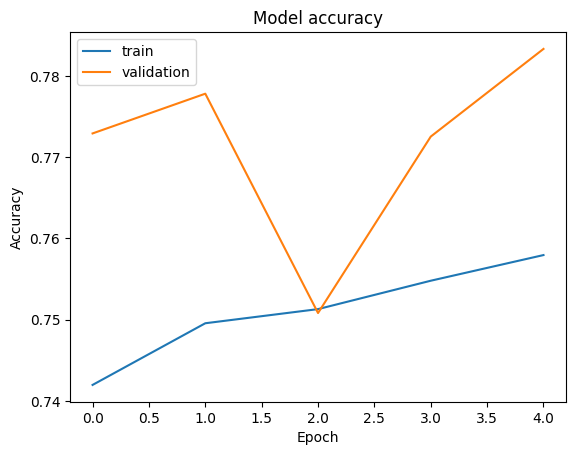

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### Loss

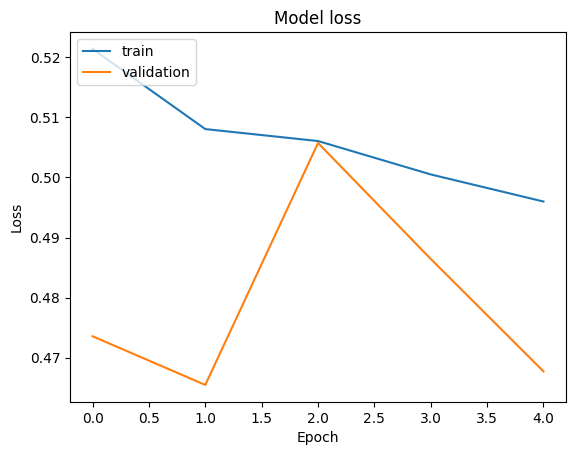

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

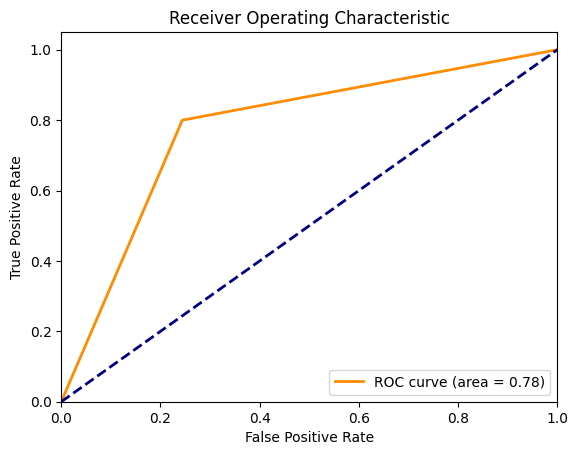

In [ ]:
# Draw the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_cmp, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Save Model

In [ ]:
# save the model
# model.save("sentiment_analysis.h5")

In [ ]:
# load the model
from keras.models import load_model

model = load_model("sentiment_analysis.h5")

# predict the sentiment
def predict_sentiment(text):
    text = tokenizer_keras.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=38)
    sentiment = model.predict(text)
    return np.argmax(sentiment)

text = "I hate you"
print(predict_sentiment(text))

1/1 [==============================] - 0s 214ms/step
0


In [ ]:
def Pred (text):
    data = predict_sentiment(text)
    if data == 0: return 'Negative'
    return 'Positive'

print(Pred('I love you'))

1/1 [==============================] - 0s 13ms/step
Positive


In [ ]:
txt = "I was disappointed to me. I Hate myself."
print(Pred(txt))

1/1 [==============================] - 0s 19ms/step
Negative


In [ ]:
txt2 = "Hollis' death scene will hurt me severely to watch on film  wry is directors cut not out now?"
print(Pred(txt2))

1/1 [==============================] - 0s 16ms/step
Negative


In [ ]:
txt3 = "my whole body feels itchy and like its on fire"
print(Pred(txt3))

1/1 [==============================] - 0s 11ms/step
Positive


#### Use Bert

In [ ]:
# Use Bert to convert words
import torch
from transformers import BertTokenizer, BertModel

# 检查是否有可用的GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# model.to(device)

# X = new_data['text'].apply(lambda x: " ".join(x))

def to_bert (text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def text_to_bert(text, tokenizer, model, device):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()


bert_embeddings = []

for i in range(0, len(new_data)):
    batch_texts = new_data['text'].tolist()
    batch_embeddings = [text_to_bert(text, tokenizer, model, device) for text in batch_texts]
    bert_embeddings.extend(batch_embeddings)

X = np.array(bert_embeddings)

In [ ]:
X = []
for sentence in new_data['text']:
    X.append(sentence)

print(X[0])

love health uandpet u guy r best


In [ ]:
all_words = set()
for sentence in X:
    words = sentence.split()
    for word in words:
        all_words.add(word)

print(len(all_words))

691491


In [ ]:
bert_embeddings = []
batch_size = 128

for text in all_words:
    batch_embeddings = [to_bert(text, tokenizer, model)]
    bert_embeddings.extend(batch_embeddings)

# X_bert = np.array(bert_embeddings)
# y = pd.get_dummies(new_data["target"]).values

In [ ]:
# establish the word to embedding dictionary
word_to_embedding = {word: bert_embeddings[i] for i, word in enumerate(all_words)}


#### Load Pre-trained result

In [ ]:
# save the dictionary to a file
import pickle

# with open("word_to_embedding.pkl", "wb") as f:
#     pickle.dump(word_to_embedding, f)

# load the dictionary
# with open("word_to_embedding.pkl", "rb") as f:
#     word_to_embedding = pickle.load(f)
with open("drive/MyDrive/Data/word_to_embedding.pkl", "rb") as f:
    word_to_embedding = pickle.load(f)


In [ ]:
def text_to_embedding(text, word_to_embedding, embedding_dim=768):
    embeddings = [word_to_embedding[word] for word in text if word in word_to_embedding]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(embedding_dim)

In [28]:
df = None
data = None
dataset = None
data_pos = None
data_neg = None
words = None

choose_size = 40000
new_data = new_data.sample(choose_size, random_state=42)

In [ ]:
new_data['embedding'] = new_data['text'].apply(lambda x: text_to_embedding(x, word_to_embedding))
X = np.stack(new_data['embedding'].values)
y = pd.get_dummies(new_data['target']).values

In [ ]:
word_to_embedding = None

In [ ]:
new_data = None

#### Bert Split Data

In [27]:
df = None
data = None
dataset = None
data_pos = None
data_neg = None
words = None

choose_size = 40000
new_data = new_data.sample(choose_size, random_state=42)

In [28]:
from sklearn.model_selection import train_test_split

X = new_data['text']
y = new_data['target']

y = np.argmax(y, axis=1)
y = np.array(y)
# new_data = None

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32000,)
(8000,)
(32000,)
(8000,)


In [29]:
X = None
y = None

#### Use Model (Bert)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import L2

embed_dim = 768

model = Sequential()

# model.add(SpatialDropout1D(0.4))

# model.add(LSTM(units=LSTM_out, dropout=0.2, input_shape=(embed_dim, 768)))
# model.add(Dense(128, input_shape=(768, ), activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(units=10, activation='relu'))
model.add(Dense(128, input_shape=(embed_dim, ), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax', kernel_regularizer=L2(0.01)))


model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               98432     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                        

In [ ]:
from keras import callbacks

# 連續3次val_loss沒有改善，就停止訓練
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=3, mode="min", restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data = (x_test, y_test), callbacks=[early_stopping])

Epoch 1/5
2000/2000 [==============================] - 15s 4ms/step - loss: 0.6938 - accuracy: 0.5649 - val_loss: 0.6776 - val_accuracy: 0.5682
Epoch 2/5
2000/2000 [==============================] - 9s 5ms/step - loss: 0.6754 - accuracy: 0.5781 - val_loss: 0.6696 - val_accuracy: 0.5892
Epoch 3/5
2000/2000 [==============================] - 10s 5ms/step - loss: 0.6742 - accuracy: 0.5797 - val_loss: 0.6696 - val_accuracy: 0.5872
Epoch 4/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6735 - accuracy: 0.5816 - val_loss: 0.7128 - val_accuracy: 0.5203
Epoch 5/5
2000/2000 [==============================] - 10s 5ms/step - loss: 0.6735 - accuracy: 0.5812 - val_loss: 0.6766 - val_accuracy: 0.5687


#### Use Pre Load Bert Model (Successful version)

In [30]:
import tensorflow_hub as hub # Tensorflow bert 社群
import tensorflow_text as text

In [32]:
import tensorflow as tf

tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3"

def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(text_input, net)


In [33]:
# X = new_data['text']
# y = new_data['target']

# new_data = None

In [37]:
# print(type(y))

<class 'pandas.core.series.Series'>


In [38]:
print(y[:5])
# print(type(y))
# y = np.array(y)

1341200    1
800750     1
1566711    1
1085055    1
1505995    1
Name: target, dtype: int64
<class 'pandas.core.series.Series'>


In [40]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(32000,)
(8000,)
(32000,)
(8000,)


In [41]:
model = build_classifier_model()

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

epochs = 5
batch_size = 32

init_lr = 3e-5
optimizer = tf.keras.optimizers.Adam(learning_rate=init_lr)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# 印出模型摘要
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [42]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=batch_size, callbacks=[early_stopping])

print(history.history)

Epoch 1/3
1000/1000 [==============================] - 1080s 1s/step - loss: 0.4961 - binary_accuracy: 0.7436 - val_loss: 0.4482 - val_binary_accuracy: 0.7761
Epoch 2/3
1000/1000 [==============================] - 969s 969ms/step - loss: 0.3774 - binary_accuracy: 0.8300 - val_loss: 0.4842 - val_binary_accuracy: 0.7822
Epoch 3/3
1000/1000 [==============================] - 963s 963ms/step - loss: 0.2497 - binary_accuracy: 0.8952 - val_loss: 0.5766 - val_binary_accuracy: 0.7845
{'loss': [0.4961470067501068, 0.3774353563785553, 0.2496606856584549], 'binary_accuracy': [0.7436249852180481, 0.8299687504768372, 0.8951562643051147], 'val_loss': [0.44818115234375, 0.48416319489479065, 0.5765739679336548], 'val_binary_accuracy': [0.7761250138282776, 0.7822499871253967, 0.784500002861023]}


#### Show Classification Report

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)

#### Accuracy & Loss Plot (BERT)

##### Accuracy

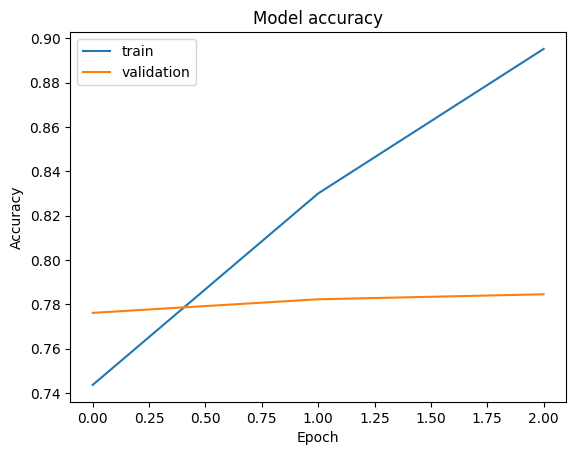

In [45]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### Loss

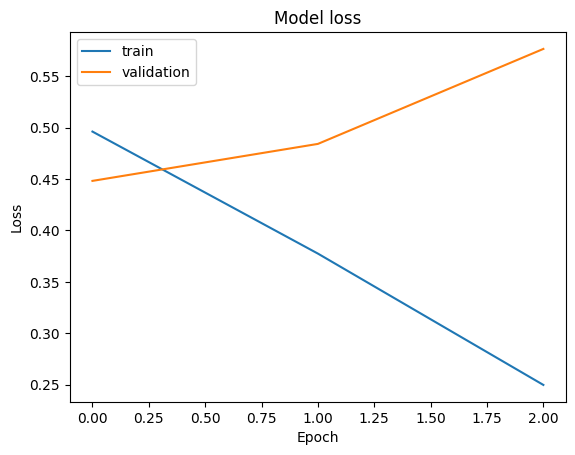

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##### ROC Curve

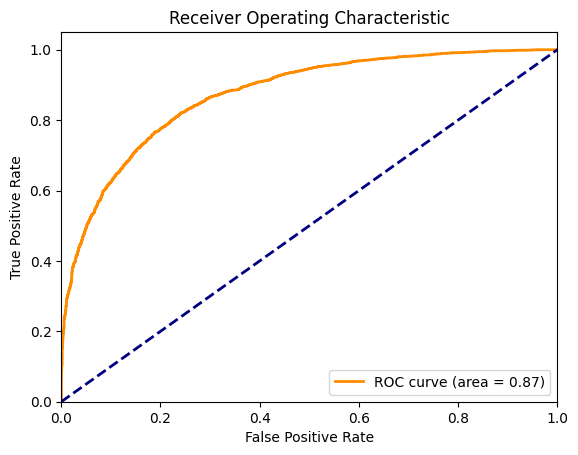

In [47]:
# Draw the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()